In [34]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
from numpy.linalg import inv
import statsmodels.api as sm
import pandas as pd
import re
from sklearn.linear_model import LinearRegression

In [35]:
df = pd.read_csv('/Users/tiziana/Desktop/PYTHON/TESI MAGISTRALE/PCA/DATESET.csv')
df=df.iloc[:, 1:]
df.head()


df.set_index(['Country'],inplace=True)
gre = pd.DataFrame(df.loc['Germany'])



gre.reset_index(inplace=True)
gre=gre.drop(['Country','Trimestre'],axis=1)

In [36]:
dftest = adfuller(gre['Gdp growth'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print(f'Gdp growth is Stationary ')
else:
    print('Non stationary')



dftest = adfuller(gre['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print('Current Account Non stationary')


dftest = adfuller(gre['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print('Public Debt Non stationary')



dftest = adfuller(gre['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print(f'Financial Index is Stationary con p-value{dftest[1]}')
else:
    print(f'Financial Index Non stationary con p-value {dftest[1]}')

Gdp growth is Stationary 
Current Account Non stationary
Public Debt Non stationary
Financial Index Non stationary con p-value 0.8773893771309192


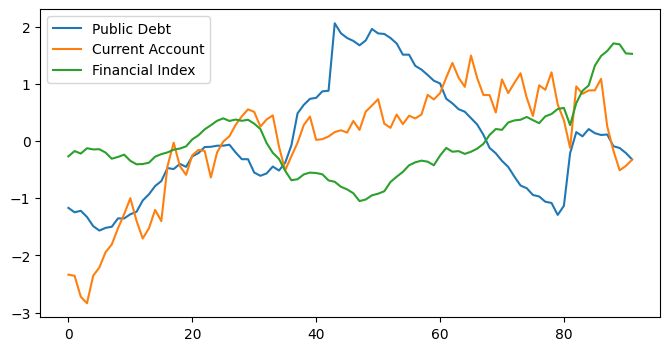

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 4))
plt.plot(gre['Public Debt'], label='Public Debt')
plt.plot(gre['Current Account'], label='Current Account')
plt.plot(gre['Financial index'], label='Financial Index')


plt.legend()

In [38]:
from statsmodels.tsa.api import VAR
model = VAR(gre)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()


,AIC,BIC,FPE,HQIC
0,-3.961,-3.846,0.01904,-3.915
1,-12.26,-11.68*,4.740e-06,-12.03*
2,-12.41*,-11.37,4.099e-06*,-11.99
3,-12.29,-10.78,4.663e-06,-11.68
4,-12.31,-10.34,4.628e-06,-11.52
5,-12.15,-9.717,5.532e-06,-11.17
6,-12.12,-9.223,5.887e-06,-10.95
7,-12.23,-8.871,5.506e-06,-10.88
8,-12.27,-8.447,5.624e-06,-10.73


In [39]:
ger_coin = ger.drop('Gdp growth',axis=1)
ger_coin

,Current Account,Public Debt,Financial index
1,-0.020497,-0.077133,0.091776
2,-0.366234,0.026608,-0.043449
3,-0.113557,-0.108226,0.093164
4,0.481258,-0.159797,-0.020715
5,0.145396,-0.077881,0.003515
...,...,...,...
87,-0.833240,0.008371,0.088186
88,-0.424626,-0.205240,0.132290
89,-0.340148,-0.030644,-0.016922
90,0.075361,-0.087298,-0.158565


In [40]:

from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
test = coint_johansen(ger_coin, det_order=1, k_ar_diff=2)

output = pd.DataFrame([test.lr1],  index=["trace_stat"], columns=['r=0', 'r<=1', 'r<=2'])
print(output.T, '\n')

cvt = pd.DataFrame(test.cvt, index=["r=0", "r<=1", "r<=2"], columns=["90%", "95%", "99%"])
print("Critical values(90%, 95%, 99%) of trace_stat\n", cvt, '\n')

print("Eigenvalues (lambda):\n")
print(test.eig, "\n")

print("Eigenvectors:")
evec = pd.DataFrame(test.evec).T
print(evec)

      trace_stat
r=0    85.725771
r<=1   29.005580
r<=2   10.131269 

Critical values(90%, 95%, 99%) of trace_stat
           90%      95%      99%
r=0   32.0645  35.0116  41.0815
r<=1  16.1619  18.3985  23.1485
r<=2   2.7055   3.8415   6.6349 

Eigenvalues (lambda):

[0.47510006 0.1930397  0.10874799] 

Eigenvectors:
          0         1          2
0  6.015216  2.266442  -1.100103
1  2.226965 -6.744241   2.558615
2 -1.357313  2.525746  14.543923


In [41]:
gre['Gdp growth']=gre['Gdp growth']
gre['Current Account'] = gre['Current Account'].diff(1)
gre['Public Debt'] = gre['Public Debt'].diff(1)
gre['Financial index'] = gre['Financial index'].diff(1)

gre=gre.iloc[1:]

In [42]:
dftest = adfuller(gre['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print('Current Account Non stationary')


dftest = adfuller(gre['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print('Public Debt Non stationary')



dftest = adfuller(gre['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Financial Index is Stationary')
else:
    print('Financial Index Non stationary')

Current Account is Stationary
Public Debt is Stationary
Financial Index is Stationary


In [43]:
from statsmodels.tsa.api import VAR
model = VAR(gre)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,-12.07,-11.96*,5.712e-06,-12.03
1,-12.49*,-11.91,3.769e-06*,-12.26*
2,-12.35,-11.30,4.353e-06,-11.93
3,-12.34,-10.82,4.424e-06,-11.73
4,-12.13,-10.14,5.546e-06,-11.33
5,-12.11,-9.660,5.767e-06,-11.12
6,-12.05,-9.139,6.290e-06,-10.88
7,-11.97,-8.590,7.153e-06,-10.61
8,-11.87,-8.028,8.387e-06,-10.33


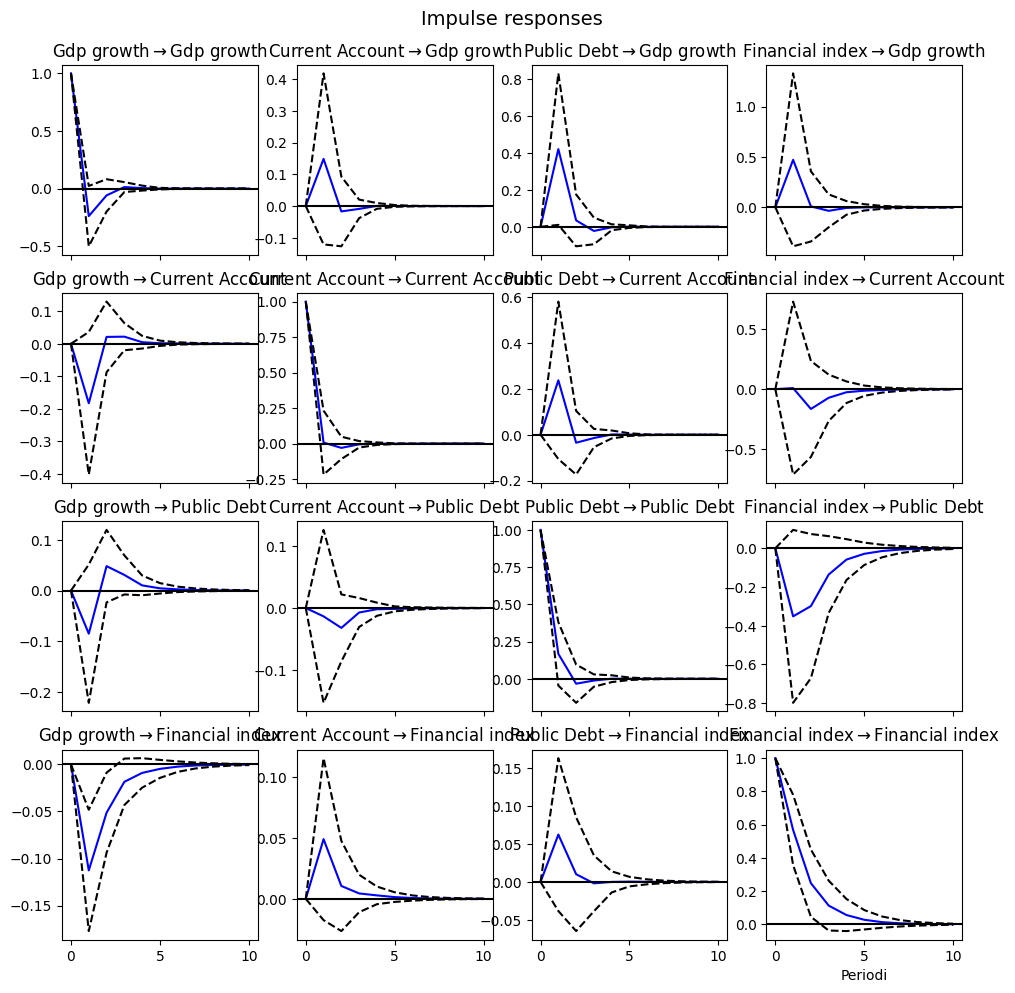

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 169.135, critical value: 173.004>, p-value: 0.075>


In [44]:
model = sm.tsa.VAR(ger)

# Stima il modello con un ordine di 6
results = model.fit(1)
irf = results.irf(10)

irf.plot(orth=False)
plt.xlabel('Periodi')

plt.show()
whiteness_test_result = results.test_whiteness(nlags=10)
print(whiteness_test_result)

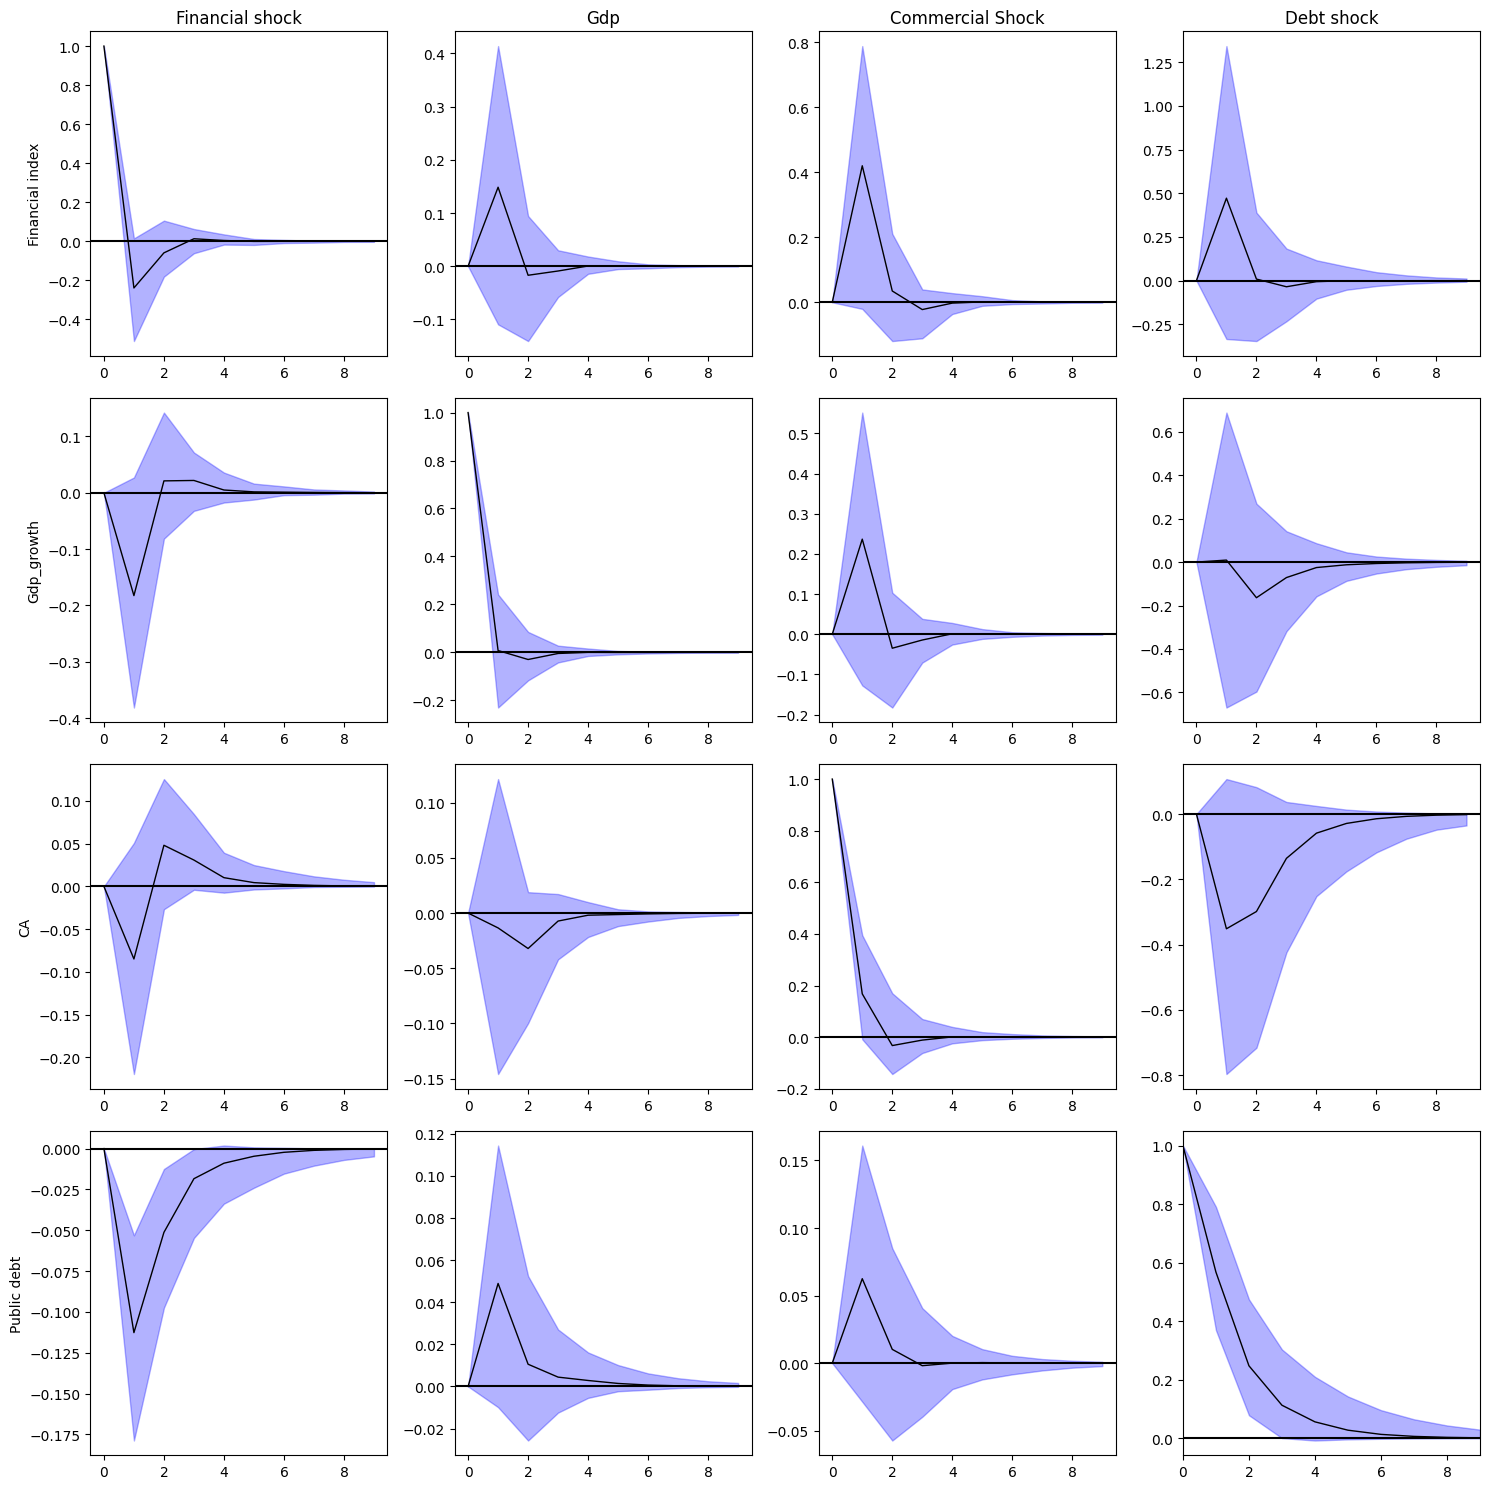

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Supponiamo che gre sia già definito
m = 4  # Considered Variable
p = 1  # Number of lags based on AIC criterion
c = 1  # Constant term
h = 10 # IRF horizon

T = len(gre)
Y = gre.iloc[p:, :]  # Adjust for lags

# Create lagged matrix
X_lagged = pd.DataFrame()
for col in gre.columns:
    for i in range(1, p+1):
        X_lagged[f'{col}_lag_{i}'] = gre[col].shift(i)
X_lagged = X_lagged.iloc[p:, :]
X_lagged = X_lagged[[col for lag in sorted(set(int(re.search(r'_lag_(\d+)$', col).group(1)) if re.search(r'_lag_(\d+)$', col) else 0 for col in X_lagged.columns)) for col in [x for x in X_lagged.columns if re.search(fr'_lag_{lag}$', x)]] + [x for x in X_lagged.columns if not re.search(r'_lag_\d+$', x)]]
X_lagged.insert(0, 'const', 1)

# Estimate VAR model
pi_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_lagged.T, X_lagged)), X_lagged.T), Y)
Y_fit = np.dot(X_lagged, pi_hat)
err = Y - Y_fit

A_comp = np.block([
    [pi_hat[1:, :].T],
    [np.eye(m * p - m), np.zeros((m * p - m, m))]
])

PHI = np.zeros((m, m, h))
for j in range(h):
    PHI_comp = np.linalg.matrix_power(A_comp, j)
    PHI[:, :, j] = PHI_comp[:m, :m]

PHI_plot = np.reshape(np.transpose(PHI, (2, 0, 1)), (h, m*m))

VARnames = ['Financial index', 'Gdp_growth', 'CA', 'Public debt']
Shocknames = ['Financial shock', 'Gdp', 'Commercial Shock', 'Debt shock']

ylab = 0

# Bootstrap per intervalli confidenza
n_bootstrap = 1000  #Iterazioni
alpha = 0.05        #Livello di significatività
bootstrap_phis = np.zeros((n_bootstrap, m, m, h))  #Creo una matrice per ora composta da soli zero che successivamente andrà riempita con i valori IRF bootstrappate

for b in range(n_bootstrap):
    
    resampled_err = err.sample(frac=1, replace=True).values  #Si campionano casualmente i residui del modello.Se ne estrae un sottoinsieme.
    Y_bootstrap = Y_fit + resampled_err                      #Con tali residui si calcola una nuova serie ottenuta a partire precedente, aggiungendo errori boostrappati

    #A QUESTO PUNTO SI CALCOLA NUOVAMENTE VAR SULLA SERIE PERO BOOSTRAPPATA
    pi_hat_bootstrap = np.dot(np.dot(np.linalg.inv(np.dot(X_lagged.T, X_lagged)), X_lagged.T), Y_bootstrap)
    A_comp_bootstrap = np.block([
        [pi_hat_bootstrap[1:, :].T],
        [np.eye(m * p - m), np.zeros((m * p - m, m))]
    ])

#TIPO QUI CALCOLO LE IRF  DELLA SERIE CON IL BOOTSTRAP
    for j in range(h):
        PHI_comp_bootstrap = np.linalg.matrix_power(A_comp_bootstrap, j)
        bootstrap_phis[b, :, :, j] = PHI_comp_bootstrap[:m, :m]

lower_bound = np.percentile(bootstrap_phis, alpha/2*100, axis=0)
upper_bound = np.percentile(bootstrap_phis, (1-alpha/2)*100, axis=0)

fig, axes = plt.subplots(m, m, figsize=(15, 15))
axes_flat = axes.flatten()
for k in range(m*m):
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_plot[:, k], linewidth=1, color='k')
    lb = lower_bound[k // m, k % m, :]
    ub = upper_bound[k // m, k % m, :]
    ax.fill_between(np.arange(h), lb, ub, color='blue', alpha=0.3)
    ax.axhline(0, color='k', linestyle='-')
    if k < 4:
        ax.set_title(Shocknames[k])
    if k in [0, 4, 8, 12]:  # Corrected indices for labels
        ax.set_ylabel(VARnames[ylab])
        ylab += 1
ax.set_xlim([0, h-1])
plt.tight_layout()
plt.show()

In [46]:
#pi_hat è esattamente matrice coefficenti
coefficents = pd.DataFrame(pi_hat)
coefficents.columns = ['Gdp growth','Current Account','Public Debt','Financial index']
coefficents.index = ['Const.','Gdp_l1','Ca_l1','Pd_l1','Fi_l1',]
#La traspongo perchè così è facile vedere le diverse equazioni,ciascuna con un'esogena differente, riportata come indice
coefficents=coefficents.transpose()
coefficents

,Const.,Gdp_l1,Ca_l1,Pd_l1,Fi_l1
Gdp growth,-0.306722,-0.238757,0.148560,0.420196,0.471700
Current Account,-0.022534,-0.182618,0.007532,0.236794,0.009192
Public Debt,-0.003813,-0.084865,-0.013484,0.167596,-0.351536
Financial index,-0.020202,-0.112656,0.048900,0.062525,0.567710


In [47]:
#Matrice varianza covarianza residui,corretta per gradi libertà al fine di garantire robustezza
omega = np.dot(err.T, err) / (T - p - 1)

#Inversa della matrice di Gram, il termine tra parentesi nell'equzione dei coefficenti di regression: beta^ = (X_Transposed * X) X^(-1)y
X_lagged_inv = np.linalg.inv(np.dot(X_lagged.T, X_lagged))

#Prodotto di kronecher tra le due matrici,che permette di ottenere la matrice di varianza covarianza dei COEFFICENTI
var_cov_matrix = np.kron(omega, X_lagged_inv)

#Calcolo errore standard dei coefficenti: valori diagonale var_cov divisi per  la loro sqrt()
std_err = np.sqrt(np.diag(var_cov_matrix).reshape(pi_hat.shape))

#Creazione DataFrame per errori standard
std_err_df = pd.DataFrame(std_err, index=coefficents.columns, columns=[col + '_std' for col in coefficents.index])
std_err_df=std_err_df.transpose()

#Valore della statistica test per ciascun coefficente, ottenuta come rapporto  tra la matrice dei coefficenti e la matrice dei rispettivi errori standard
t_values = pi_hat / std_err
t_values_df = pd.DataFrame(t_values, index=coefficents.columns, columns=[col + '_t' for col in coefficents.index])


In [48]:
from scipy.stats import t

#Se ho 300 ossrvazioni, m=10 equzioni(variabili) in ognuna delle quali ci vanno p=10 coefficenti (ritardi), 99 valori sono assegnati quindi ho 201 gradi di libertà
degrees_of_freedom = T - (m * p) - 1

#Calcolo del p-value come 2(visto che sto ipotizzando due code) *(probabilità di ottenre un valore piu estremo di quello della statistica test osservata)
p_values = 2 * (1 - t.cdf(np.abs(t_values), df=degrees_of_freedom))


p_values_df = pd.DataFrame(p_values, index=coefficents.columns, columns=[col + '_p' for col in coefficents.index])
print("p-values DataFrame:")
p_values_df.transpose()

p-values DataFrame:


,Const.,Gdp_l1,Ca_l1,Pd_l1,Fi_l1
Gdp growth_p,1.102977e-07,0.578732,0.386544,4.128413e-08,0.000000e+00
Current Account_p,8.634222e-01,0.000084,0.983262,2.823643e-02,7.817399e-01
Public Debt_p,9.774212e-01,0.438962,0.625111,4.534079e-01,5.558130e-10
Financial index_p,9.214451e-01,0.318382,0.473000,6.706198e-06,6.274010e-07


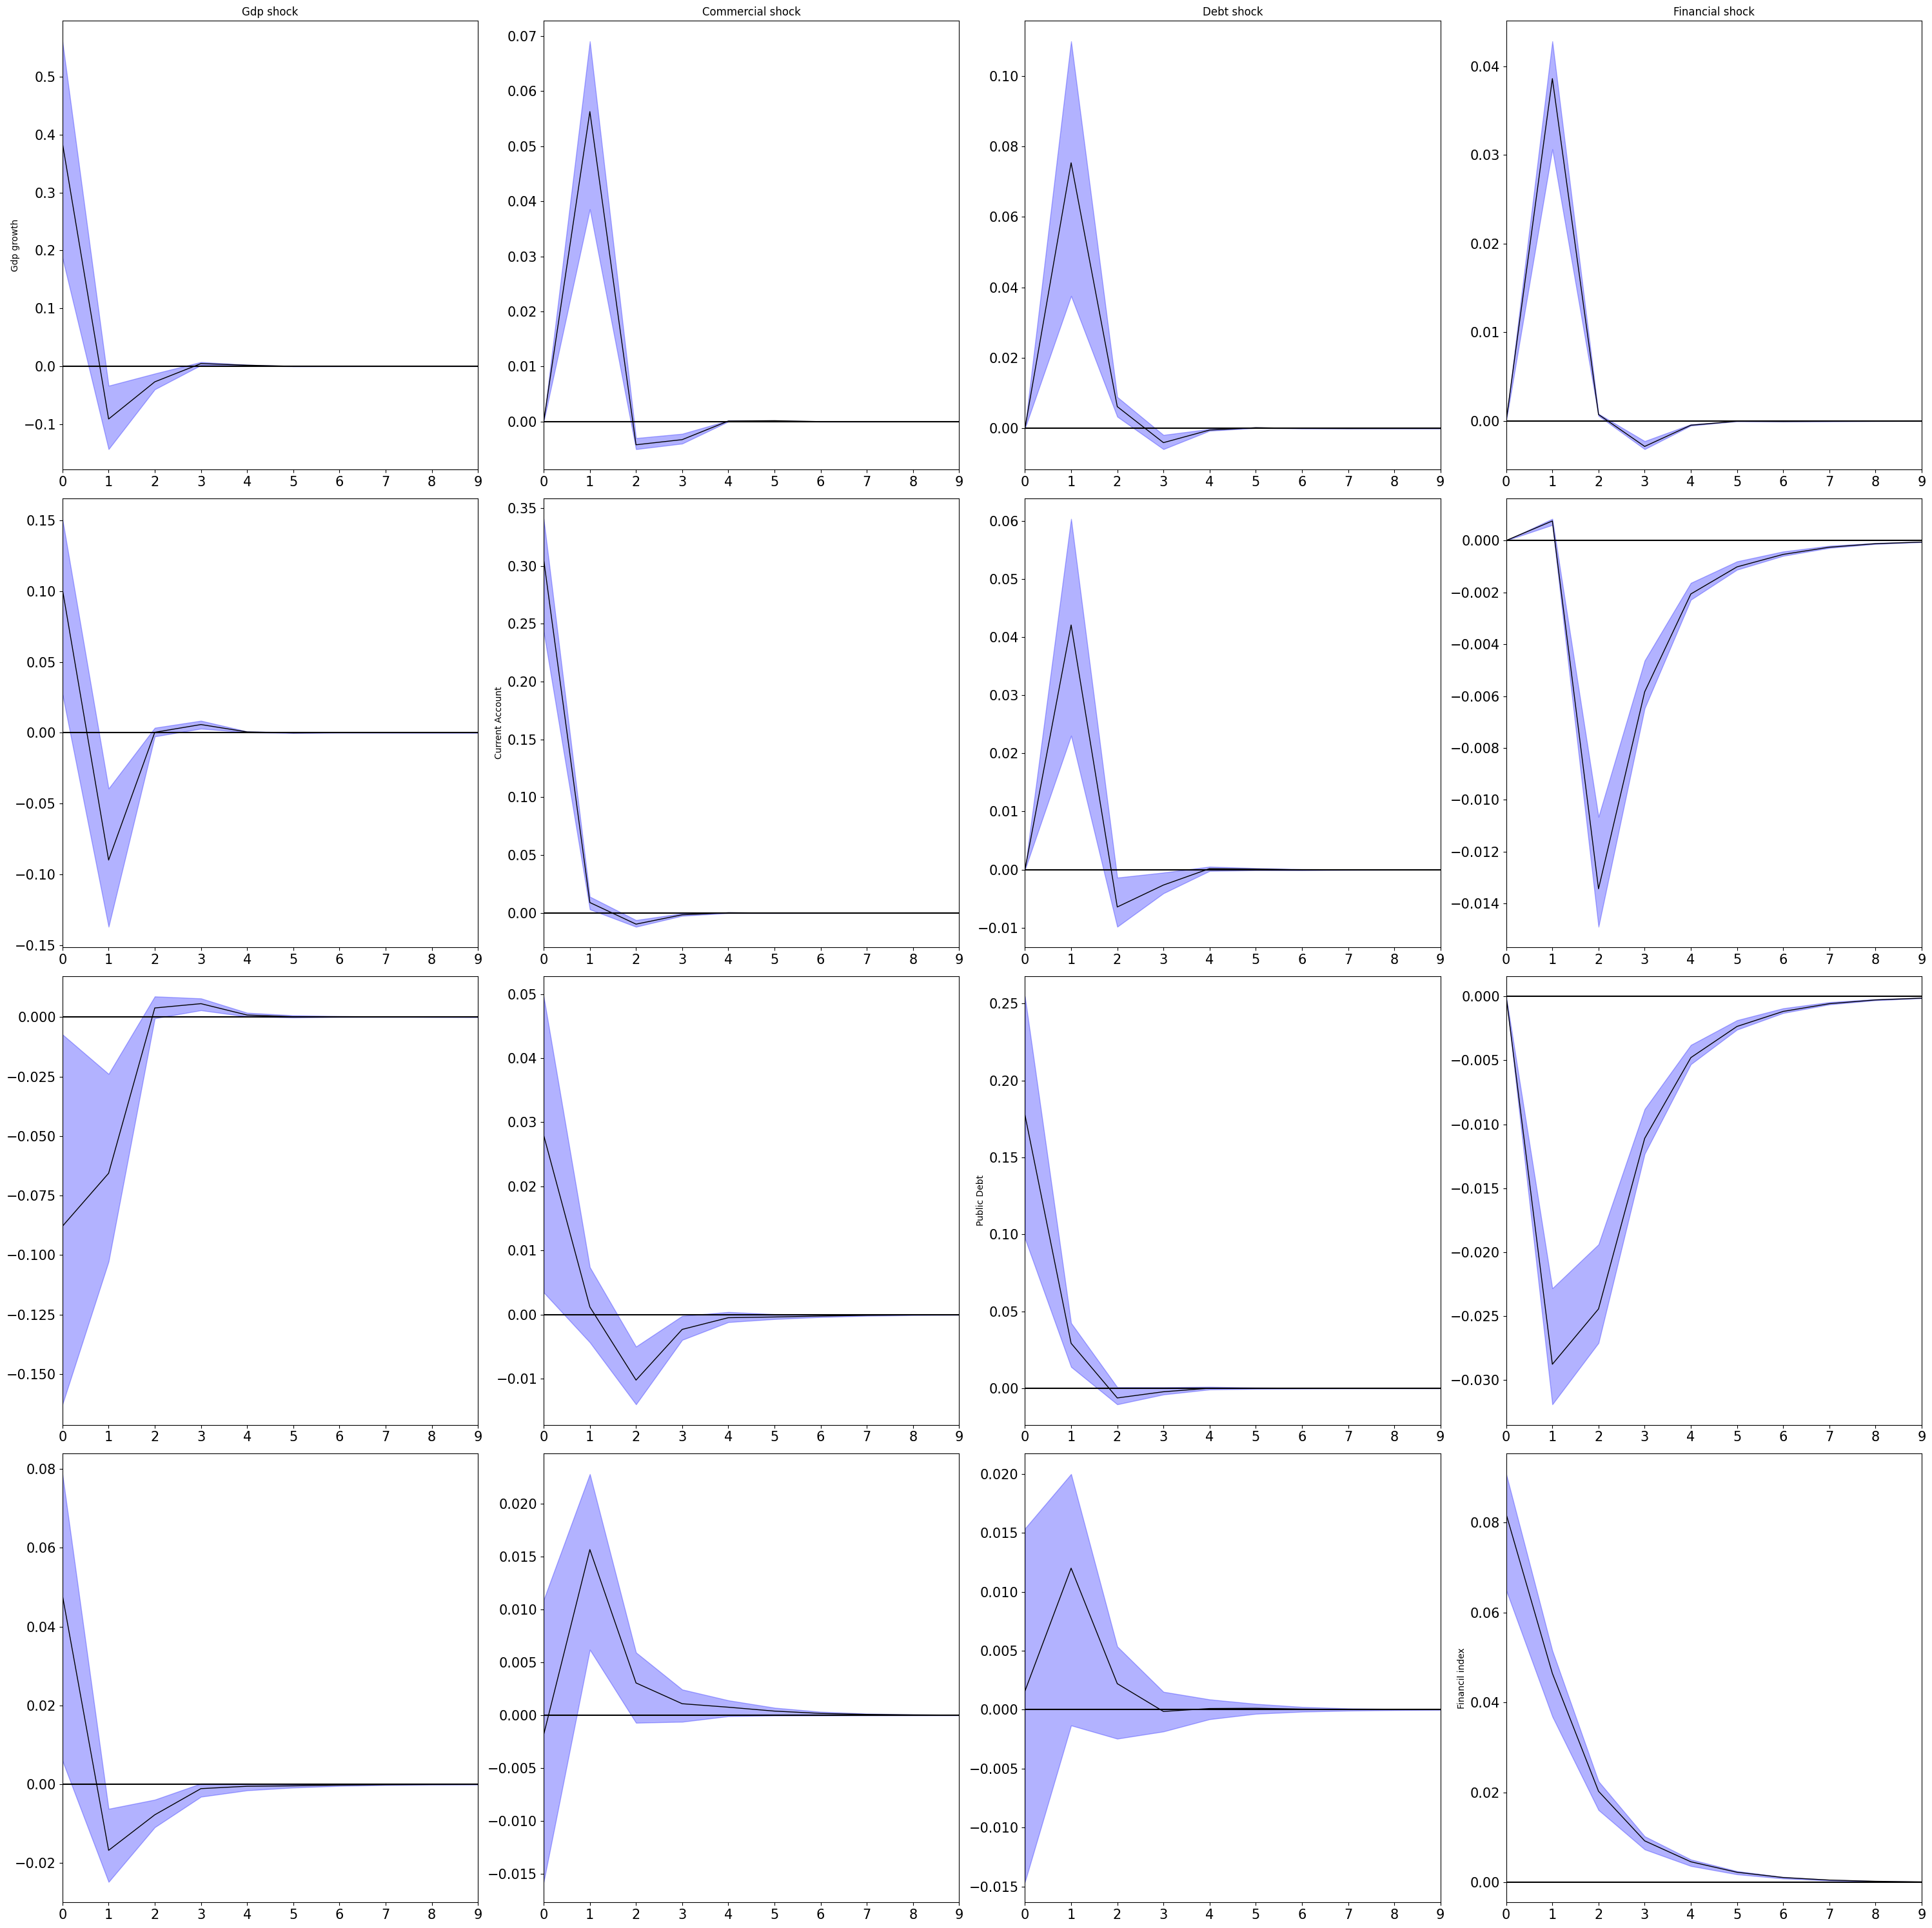

In [49]:

T = len(gre) - m * p - m

#Si calcola ancora la matrice di varianza e covarianza degli errori
omega = np.dot(err.T, err) / T

#Calcolo P, la matrice  che risulta dalla scomposzione di Cholewsky
P = np.linalg.cholesky(omega)

#Viene creata, per poi essere riempita, un tensor (credo sia un tensore,altrimenti è matrice tridimensionale)
PHI_SR = np.zeros((m, m, h))

#Si itera per ogni periodo  il prodotto tra la matrice di risposta all'impulso e la matrice di cholewsky P
for i in range(h):
    PHI_SR[:, :, i] = np.dot(PHI[:, :, i], P)
PHI_SR_plot = np.reshape(np.transpose(PHI_SR, (2, 0, 1)), (h, m*m))

VARnames = ['Gdp growth', 'Current Account', 'Public Debt','Financil index'] 
Shocknames = ['Gdp shock', 'Commercial shock', 'Debt shock','Financial shock']
ylab = 0
# Create subplots
ffig, axes = plt.subplots(m, m, figsize=(30, 30))
axes_flat = axes.flatten()
ylab = 0

# Parametri del bootstrap
B = 1000  # Numero di bootstrap
percentile = 95  # Intervallo di confidenza del 95%

# Bootstrap per calcolare gli intervalli di confidenza
PHI_SR_bootstrap = np.zeros((B, h, m * m))

for b in range(B):
    # Resampling con ripetizione dei residui
    err_bootstrap = err.sample(n=T, replace=True, axis=0).to_numpy()
    
    # Calcolo della matrice di covarianza dei residui bootstrap
    omega_bootstrap = np.dot(err_bootstrap.T, err_bootstrap) / T
    
    # Decomposizione di Cholesky di omega_bootstrap
    P_bootstrap = np.linalg.cholesky(omega_bootstrap)
    
    # Calcolo delle IRF bootstrap
    PHI_SR_bootstrap_b = np.zeros((m, m, h))
    for i in range(h):
        PHI_SR_bootstrap_b[:, :, i] = np.dot(PHI[:, :, i], P_bootstrap)
    
    PHI_SR_bootstrap[b, :, :] = np.reshape(np.transpose(PHI_SR_bootstrap_b, (2, 0, 1)), (h, m * m))

# Calcolo degli intervalli di confidenza
lower_bound = np.percentile(PHI_SR_bootstrap, (100 - percentile) / 2, axis=0)
upper_bound = np.percentile(PHI_SR_bootstrap, 100 - (100 - percentile) / 2, axis=0)

# Grafico delle IRF con intervalli di confidenza
for k in range(m * m):
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_SR_plot[:, k], linewidth=1, color='k', label='IRF')
    ax.fill_between(np.arange(h), lower_bound[:, k], upper_bound[:, k], color='blue', alpha=0.3, label='CI')
    ax.axhline(0, color='k', linestyle='-')
    
    if k < 4: 
        ax.set_title(Shocknames[k])
    if k in [0, 5, 10, 15]: 
        ax.set_ylabel(VARnames[ylab])
        ylab += 1

    ax.set_xlim([0, h - 1])
    ax.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

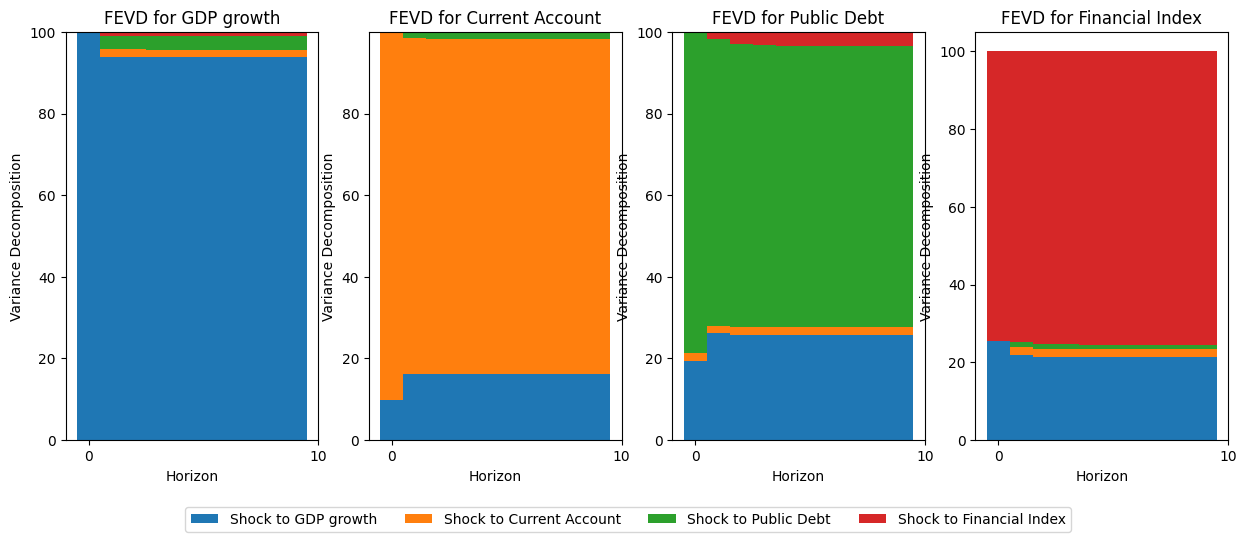

In [50]:
h = 10
MSE = np.zeros((m, m, h))
MSE_shock = np.zeros((m, m, h))
FEVD = np.zeros((h, m, m))

MSE[:, :, 0] = omega
for ii in range(m):
    for nn in range(1, h):
        MSE[:, :, nn] = MSE[:, :, nn - 1] + PHI[:, :, nn] @ omega @ PHI[:, :, nn].T
    MSE_shock[:, :, 0] = P[:, ii].reshape(-1, 1) @ P[:, ii].reshape(1, -1)

    for nn in range(1, h):
        MSE_shock[:, :, nn] = MSE_shock[:, :, nn - 1] + PHI[:, :, nn] @ MSE_shock[:, :, 0] @ PHI[:, :, nn].T
    FECD = MSE_shock[:, :, :] / MSE[:, :, :]

    for nn in range(h):
        for kk in range(m):
            FEVD[nn, ii, kk] = 100 * FECD[kk, kk, nn]

def plot_FEVD(FEVD_result, variable_names, horizon=40):
    """
    Plot FEVD results using stacked bar plots in subplots.
    FEVD_result: The FEVD matrix of shape (n, n, horizon)
    variable_names: List of names of the variables
    horizon: The number of periods ahead for the forecast
    """
    FEVD_result = FEVD_result.transpose((2, 1, 0))
    n = FEVD_result.shape[0]
    cols = 4
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6 * rows))
    fig.subplots_adjust(bottom=0.2, hspace=0.4)

    if rows == 1:
        axes = axes.flatten()
    for i in range(n):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        bottom_values = np.zeros(horizon)
        for j in range(n):
            ax.bar(np.arange(horizon), FEVD_result[i, j, :], bottom=bottom_values, width=1, label=f"Shock to {variable_names[j]}")
            bottom_values += FEVD_result[i, j, :]
        ax.set_title(f"FEVD for {variable_names[i]}")
        ax.set_xlabel("Horizon")
        ax.set_ylabel("Variance Decomposition")
        ax.set_xticks(np.linspace(0, horizon, int(horizon / 10) + 1, endpoint=True))

    for i in range(n, rows * cols):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        ax.axis('off')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=len(variable_names))

variable_names = ['GDP growth', 'Current Account', 'Public Debt', 'Financial Index']
plot_FEVD(FEVD, variable_names, h)


In [51]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(gre[['Current Account', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5656  , p=0.2142  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=1.6196  , p=0.2031  , df=1
likelihood ratio test: chi2=1.6052  , p=0.2052  , df=1
parameter F test:         F=1.5656  , p=0.2142  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6951  , p=0.5018  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=1.4730  , p=0.4788  , df=2
likelihood ratio test: chi2=1.4610  , p=0.4817  , df=2
parameter F test:         F=0.6951  , p=0.5018  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6570  , p=0.5809  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=2.1412  , p=0.5436  , df=3
likelihood ratio test: chi2=2.1156  , p=0.5488  , df=3
parameter F test:         F=0.6570  , p=0.5809  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (1.5656450596718456, 0.21419478683510326, 87.0, 1),
   'ssr_chi2test': (1.6196328203501853, 0.20314299313593454, 1),
   'lrtest': (1.60523194354829, 0.20516334115749402, 1),
   'params_ftest': (1.5656450596718725, 0.21419478683510035, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6951463787683476, 0.5018488215526746, 84.0, 2),
   'ssr_chi2test': (1.4730482788186414, 0.47877518247085504, 2),
   'lrtest': (1.4609908515926406, 0.48167029907675807, 2),
   'params_ftest': (0.6951463787683533, 0.5018488215526722, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.6569603923494585, 0.5809136768921872, 81.0, 3),
   'ssr_chi2test': (2.141204241731568, 0.5436219446667685, 3),
   'lrtest': (2.1155694891770906, 0.5487693772596032, 3),
   'params_ftest': (0.6569603923494579, 0.5809136768921872, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [52]:
grangercausalitytests(gre[['Public Debt', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.5851  , p=0.0120  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=6.8122  , p=0.0091  , df=1
likelihood ratio test: chi2=6.5667  , p=0.0104  , df=1
parameter F test:         F=6.5851  , p=0.0120  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.1344  , p=0.0194  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=8.7610  , p=0.0125  , df=2
likelihood ratio test: chi2=8.3561  , p=0.0153  , df=2
parameter F test:         F=4.1344  , p=0.0194  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1253  , p=0.0303  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=10.1860 , p=0.0170  , df=3
likelihood ratio test: chi2=9.6384  , p=0.0219  , df=3
parameter F test:         F=3.1253  , p=0.0303  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (6.585080457844554, 0.011994958243788071, 87.0, 1),
   'ssr_chi2test': (6.812152197770228, 0.009053957607164213, 1),
   'lrtest': (6.566656977543573, 0.010390694768251, 1),
   'params_ftest': (6.585080457844561, 0.011994958243788071, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.134400149609041, 0.01938319268249662, 84.0, 2),
   'ssr_chi2test': (8.76099079321916, 0.012519155137598945, 2),
   'lrtest': (8.35614419295274, 0.015328030062487355, 2),
   'params_ftest': (4.13440014960905, 0.019383192682496518, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.1252585472357772, 0.03029551129930398, 81.0, 3),
   'ssr_chi2test': (10.186027857657349, 0.017049251545392864, 3),
   'lrtest': (9.638385526045454, 0.02190384057051697, 3),
   'params_ftest': (3.125258547235775, 0.030295511299304294, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

In [53]:
grangercausalitytests(gre[['Gdp growth', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8470  , p=0.3599  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=0.8762  , p=0.3492  , df=1
likelihood ratio test: chi2=0.8720  , p=0.3504  , df=1
parameter F test:         F=0.8470  , p=0.3599  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9480  , p=0.3916  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=2.0089  , p=0.3662  , df=2
likelihood ratio test: chi2=1.9866  , p=0.3704  , df=2
parameter F test:         F=0.9480  , p=0.3916  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1907  , p=0.3186  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=3.8807  , p=0.2746  , df=3
likelihood ratio test: chi2=3.7976  , p=0.2842  , df=3
parameter F test:         F=1.1907  , p=0.3186  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (0.8469969890653741, 0.35994813236294354, 87.0, 1),
   'ssr_chi2test': (0.8762037817917665, 0.3492435453565207, 1),
   'lrtest': (0.8719660802570104, 0.3504115889989158, 1),
   'params_ftest': (0.8469969890653755, 0.35994813236294354, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.9480174051419876, 0.39161483771399164, 84.0, 2),
   'ssr_chi2test': (2.008894025181831, 0.36624710885586603, 2),
   'lrtest': (1.9865573008846127, 0.3703604158996934, 2),
   'params_ftest': (0.9480174051419824, 0.3916148377139935, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.1906645230833357, 0.31858148517484053, 81.0, 3),
   'ssr_chi2test': (3.8806843715308714, 0.2746396418425844, 3),
   'lrtest': (3.7975530429250455, 0.2841708812364308, 3),
   'params_ftest': (1.1906645230833304, 0.3185814851748405, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

In [54]:
grangercausalitytests(gre[['Financial index', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1824  , p=0.6704  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=0.1887  , p=0.6640  , df=1
likelihood ratio test: chi2=0.1885  , p=0.6642  , df=1
parameter F test:         F=0.1824  , p=0.6704  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2390  , p=0.7880  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=0.5064  , p=0.7763  , df=2
likelihood ratio test: chi2=0.5050  , p=0.7769  , df=2
parameter F test:         F=0.2390  , p=0.7880  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4801  , p=0.6970  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=1.5649  , p=0.6674  , df=3
likelihood ratio test: chi2=1.5511  , p=0.6705  , df=3
parameter F test:         F=0.4801  , p=0.6970  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (0.18241252005797343, 0.670363250373443, 87.0, 1),
   'ssr_chi2test': (0.18870260695652422, 0.6639986270644662, 1),
   'lrtest': (0.1885050570769522, 0.6641637687808467, 1),
   'params_ftest': (0.18241252005795394, 0.6703632503734678, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.23899277436499436, 0.7879541531394681, 84.0, 2),
   'ssr_chi2test': (0.5064370694877262, 0.776298215153772, 2),
   'lrtest': (0.5050016218563087, 0.7768555828649939, 2),
   'params_ftest': (0.23899277436498814, 0.7879541531394718, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.4801354669593116, 0.6970006749144089, 81.0, 3),
   'ssr_chi2test': (1.5648859663859043, 0.6673776346490767, 3),
   'lrtest': (1.5511347274826903, 0.670519726081406, 3),
   'params_ftest': (0.48013546695931364, 0.6970006749144068, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [55]:
grangercausalitytests(gre[['Public Debt', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3221  , p=0.2534  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=1.3677  , p=0.2422  , df=1
likelihood ratio test: chi2=1.3574  , p=0.2440  , df=1
parameter F test:         F=1.3221  , p=0.2534  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2466  , p=0.2928  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=2.6415  , p=0.2669  , df=2
likelihood ratio test: chi2=2.6031  , p=0.2721  , df=2
parameter F test:         F=1.2466  , p=0.2928  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7717  , p=0.1591  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=5.7745  , p=0.1231  , df=3
likelihood ratio test: chi2=5.5930  , p=0.1332  , df=3
parameter F test:         F=1.7717  , p=0.1591  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (1.322084988155465, 0.2533691578637949, 87.0, 1),
   'ssr_chi2test': (1.3676741256780673, 0.2422119033676852, 1),
   'lrtest': (1.3573863718562507, 0.2439909602084815, 1),
   'params_ftest': (1.3220849881554935, 0.2533691578637905, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.2465649006300834, 0.2927536283821653, 84.0, 2),
   'ssr_chi2test': (2.6415303846685103, 0.26693097026707197, 2),
   'lrtest': (2.603088703284868, 0.2721112329417468, 2),
   'params_ftest': (1.2465649006300845, 0.2927536283821653, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.7717297867048998, 0.15911408705532168, 81.0, 3),
   'ssr_chi2test': (5.774526712223378, 0.1231103908580279, 3),
   'lrtest': (5.592966228954651, 0.1331827431375632, 3),
   'params_ftest': (1.7717297867048964, 0.15911408705532265, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.,

In [56]:
grangercausalitytests(gre[['Gdp growth', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4108  , p=0.1241  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=2.4939  , p=0.1143  , df=1
likelihood ratio test: chi2=2.4600  , p=0.1168  , df=1
parameter F test:         F=2.4108  , p=0.1241  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9933  , p=0.3747  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=2.1049  , p=0.3491  , df=2
likelihood ratio test: chi2=2.0804  , p=0.3534  , df=2
parameter F test:         F=0.9933  , p=0.3747  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3111  , p=0.2765  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=4.2733  , p=0.2334  , df=3
likelihood ratio test: chi2=4.1727  , p=0.2434  , df=3
parameter F test:         F=1.3111  , p=0.2765  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (2.4108148690828033, 0.12412997801627931, 87.0, 1),
   'ssr_chi2test': (2.493946416292555, 0.11428483396743347, 1),
   'lrtest': (2.4600175108527935, 0.11677748024079501, 1),
   'params_ftest': (2.410814869082812, 0.12412997801627898, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.993325464632346, 0.37465073078572975, 84.0, 2),
   'ssr_chi2test': (2.1049039607685427, 0.3490807597045925, 2),
   'lrtest': (2.0803984612290662, 0.3533842699796277, 2),
   'params_ftest': (0.9933254646323532, 0.3746507307857262, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.3111109916312398, 0.27649395900006424, 81.0, 3),
   'ssr_chi2test': (4.273250639390707, 0.23342966772986026, 3),
   'lrtest': (4.172737900074736, 0.24340555106434908, 3),
   'params_ftest': (1.3111109916312342, 0.27649395900006407, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

In [57]:
grangercausalitytests(gre[['Financial index', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3875  , p=0.0226  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=5.5733  , p=0.0182  , df=1
likelihood ratio test: chi2=5.4075  , p=0.0201  , df=1
parameter F test:         F=5.3875  , p=0.0226  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2733  , p=0.0171  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=9.0553  , p=0.0108  , df=2
likelihood ratio test: chi2=8.6237  , p=0.0134  , df=2
parameter F test:         F=4.2733  , p=0.0171  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.3622  , p=0.0067  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=14.2174 , p=0.0026  , df=3
likelihood ratio test: chi2=13.1794 , p=0.0043  , df=3
parameter F test:         F=4.3622  , p=0.0067  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (5.3875090790598685, 0.022619729514738503, 87.0, 1),
   'ssr_chi2test': (5.573285254199864, 0.01823651390943251, 1),
   'lrtest': (5.407530095514119, 0.020050065337721683, 1),
   'params_ftest': (5.387509079059859, 0.022619729514738632, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.2733012007022255, 0.017084012418084146, 84.0, 2),
   'ssr_chi2test': (9.055328734821382, 0.01080588519928209, 2),
   'lrtest': (8.623702040990906, 0.013408706817956898, 2),
   'params_ftest': (4.273301200702211, 0.017084012418084323, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (4.362165125256459, 0.006714284995953973, 81.0, 3),
   'ssr_chi2test': (14.217427074909935, 0.0026236506760987416, 3),
   'lrtest': (13.179352390917018, 0.004264370574043507, 3),
   'params_ftest': (4.362165125256455, 0.006714284995954036, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.,

In [58]:
grangercausalitytests(gre[['Current Account', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7441  , p=0.0321  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=4.9076  , p=0.0267  , df=1
likelihood ratio test: chi2=4.7785  , p=0.0288  , df=1
parameter F test:         F=4.7441  , p=0.0321  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0759  , p=0.1318  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=4.3990  , p=0.1109  , df=2
likelihood ratio test: chi2=4.2937  , p=0.1169  , df=2
parameter F test:         F=2.0759  , p=0.1318  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3347  , p=0.2689  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=4.3501  , p=0.2261  , df=3
likelihood ratio test: chi2=4.2460  , p=0.2361  , df=3
parameter F test:         F=1.3347  , p=0.2689  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (4.744051492516192, 0.03210518932706896, 87.0, 1),
   'ssr_chi2test': (4.907639475016751, 0.026738157994673457, 1),
   'lrtest': (4.778507907833102, 0.02881707950579226, 1),
   'params_ftest': (4.744051492516196, 0.03210518932706896, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.075914529954566, 0.1318299972694246, 84.0, 2),
   'ssr_chi2test': (4.3989617420465805, 0.11086069442557739, 2),
   'lrtest': (4.293703467793733, 0.1168514587762379, 2),
   'params_ftest': (2.075914529954576, 0.13182999726942346, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.3346915113606121, 0.26888368112363675, 81.0, 3),
   'ssr_chi2test': (4.35010566665681, 0.22605658022280656, 3),
   'lrtest': (4.246003200038956, 0.23609626177769008, 3),
   'params_ftest': (1.3346915113606126, 0.26888368112363675, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0